# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
# Write your code here
def is_alphanumeric(char):
    return char.isalpha() or char.isdigit()

def preprocess_text(text):
    # Lowercase the text and remove non-alphanumeric characters
    text = text.lower()
    preprocessed_text = ''
    for char in text:
        if is_alphanumeric(char) or char.isspace():
            preprocessed_text += char
    return preprocessed_text

def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(ngrams):
    ngram_counts = {}
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

def calculate_bigram_probabilities(text):
    words = text.split()
    bigrams = generate_ngrams(text, 2)
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    bigram_probabilities = {}
    for bigram in bigrams:
        w1, w2 = bigram
        bigram_count = bigrams.count(bigram)
        word_count = word_counts[w1]
        probability = bigram_count / word_count
        bigram_probabilities[bigram] = probability
    return bigram_probabilities

def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = [word for word in words if len(word) > 2]
    return noun_phrases

def calculate_relative_probabilities(dataset):
    max_freq = {}
    for text in dataset:
        noun_phrases = extract_noun_phrases(text)
        for noun in noun_phrases:
            if noun in max_freq:
                max_freq[noun] = max(max_freq[noun], noun_phrases.count(noun))
            else:
                max_freq[noun] = noun_phrases.count(noun)

    relative_probabilities = {}
    for i, text in enumerate(dataset):
        noun_phrases = extract_noun_phrases(text)
        freq = {}
        for noun in noun_phrases:
            if noun in freq:
                freq[noun] += 1
            else:
                freq[noun] = 1
        probabilities = {noun: freq[noun] / max_freq[noun] for noun in freq}
        relative_probabilities[f"Text {i+1}"] = probabilities

    return relative_probabilities

def print_table(data):
    print("{:<10}".format(""), end="")
    for column in data[next(iter(data))]:
        print("{:<15}".format(column), end="")
    print()
    for row, values in data.items():
        print("{:<10}".format(row), end="")
        for value in values.values():
            print("{:<15}".format(round(value, 2)), end="")
        print()

# Read dataset from CSV file manually
data = []
with open('/content/reviews.csv', 'r', encoding='utf-8') as file:
    for line in file:
        data.append(line.strip())

# Task 1: Count the frequency of all the N-grams (N=3)
n = 3
preprocessed_text = preprocess_text(' '.join(data))
ngrams = generate_ngrams(preprocessed_text, n)
ngram_counts = count_ngrams(ngrams)
print("N-gram Counts:", ngram_counts)

# Task 2: Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = {}
for text in data:
    preprocessed_text = preprocess_text(text)
    text_bigram_probabilities = calculate_bigram_probabilities(preprocessed_text)
    bigram_probabilities.update(text_bigram_probabilities)

# Write bigram probabilities to a file
with open('bigram_probabilities.txt', 'w') as f:
    for bigram, probability in bigram_probabilities.items():
        f.write(f"{bigram}: {probability}\n")

print("Bigram probabilities written to bigram_probabilities.txt file.")

# Task 3: Extract all the noun phrases and calculate the relative probabilities
relative_probabilities = calculate_relative_probabilities(data)
print("Relative Probabilities:")
print_table(relative_probabilities)



N-gram Counts: {('review', 'my', '3rd'): 1, ('my', '3rd', 'time'): 40, ('3rd', 'time', 'watching'): 40, ('time', 'watching', 'this'): 40, ('watching', 'this', 'movie'): 40, ('this', 'movie', 'yet'): 40, ('movie', 'yet', 'it'): 40, ('yet', 'it', 'still'): 40, ('it', 'still', 'stunned'): 40, ('still', 'stunned', 'my'): 40, ('stunned', 'my', 'mind'): 40, ('my', 'mind', 'kept'): 40, ('mind', 'kept', 'me'): 40, ('kept', 'me', 'enjoyed'): 40, ('me', 'enjoyed', 'its'): 40, ('enjoyed', 'its', 'every'): 40, ('its', 'every', 'moment'): 40, ('every', 'moment', 'and'): 40, ('moment', 'and', 'left'): 40, ('and', 'left', 'me'): 40, ('left', 'me', 'with'): 40, ('me', 'with', 'many'): 40, ('with', 'many', 'thoughts'): 40, ('many', 'thoughts', 'afterwardfor'): 40, ('thoughts', 'afterwardfor', 'someone'): 40, ('afterwardfor', 'someone', 'like'): 40, ('someone', 'like', 'me'): 40, ('like', 'me', 'whove'): 40, ('me', 'whove', 'rarely'): 40, ('whove', 'rarely', 'slept'): 40, ('rarely', 'slept', 'without'):

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [4]:
# Write your code here
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    alphanumeric_text = ''
    for character in text:
        if character.isalnum() or character.isspace():
            alphanumeric_text += character
    # Tokenize text into words
    words = alphanumeric_text.split()
    # Remove stopwords
    stop_words = set(['the', 'a', 'an', 'and', 'is', 'with', 'or', 'of', 'for', 'in', 'to', 'on', 'at', 'by'])
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

def calculate_tf(text):
    term_frequency = {}
    word_count = len(text)
    for word in text:
        if word in term_frequency:
            term_frequency[word] += 1 / word_count
        else:
            term_frequency[word] = 1 / word_count
    return term_frequency

def calculate_idf(documents):
    inverse_document_frequency = {}
    total_documents = len(documents)
    for document in documents:
        unique_words = set(document)
        for word in unique_words:
            if word in inverse_document_frequency:
                inverse_document_frequency[word] += 1
            else:
                inverse_document_frequency[word] = 1
    for word, frequency in inverse_document_frequency.items():
        inverse_document_frequency[word] = total_documents / (frequency + 1)
    return inverse_document_frequency

def calculate_tf_idf(tf, idf):
    tf_idf = {}
    for word, term_frequency in tf.items():
        tf_idf[word] = term_frequency * idf[word]
    return tf_idf

def dot_product(vector1, vector2):
    result = 0
    for key in vector1:
        if key in vector2:
            result += vector1[key] * vector2[key]
    return result

def magnitude(vector):
    magnitude_squared = sum(value ** 2 for value in vector.values())
    return magnitude_squared ** 0.5 if magnitude_squared > 0 else 0

def cosine_similarity(vector1, vector2):
    dot_product_value = dot_product(vector1, vector2)
    mag1 = magnitude(vector1)
    mag2 = magnitude(vector2)
    if mag1 == 0 or mag2 == 0:
        return 0
    return dot_product_value / (mag1 * mag2)

# Read dataset from CSV file manually
dataset_filepath = '/content/reviews.csv'
documents = []

with open(dataset_filepath, 'r', encoding='utf-8') as file:
    for line in file:
        document = line.strip()
        if document:
            documents.append(document)

# Preprocess documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Calculate TF for each document
term_frequencies = [calculate_tf(doc) for doc in preprocessed_documents]

# Calculate IDF
inverse_document_frequencies = calculate_idf(preprocessed_documents)

# Calculate TF-IDF matrix
tf_idf_matrix = [calculate_tf_idf(tf, inverse_document_frequencies) for tf in term_frequencies]

# Example query
query = "An Outstanding movie with a haunting performance and best character development"

# Preprocess query
preprocessed_query = preprocess_text(query)

# Calculate TF for query
tf_query = calculate_tf(preprocessed_query)

# Calculate TF-IDF vector for query
tf_idf_query = calculate_tf_idf(tf_query, inverse_document_frequencies)

# Calculate cosine similarity between query and each document
similarities = [cosine_similarity(tf_idf_query, tf_idf_doc) for tf_idf_doc in tf_idf_matrix]

# Rank documents based on cosine similarity
ranked_documents = sorted(zip(documents, similarities), key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranked Documents:")
for i, (document, similarity) in enumerate(ranked_documents):
    print(f"{i+1}. {document} - Similarity: {similarity:.2f}")


Ranked Documents:
1. "I'd like to keep my review rather to the point.Pros: 1. its theme - dream is a fascinating topic to say the least. There are a lot of unknowns in dreamworld.2. its plot - there are several sweet twists and unpredictable turns.3. its edgy drive - although you know what's coming next, still you feel jumpy about it when it does.4. its rapid storyline - the story moves fast from one scene to another, making the viewers feel like on a roller coaster ride. At times, it's hard to keep up, even after watching it several times.5. its sophistication - there is a lot of information to remember and digest. This is the very thing the modern moviegoers are after, I believe.6. its realism - okay, pun intended. The movie explains (or at least tries to) the ins and outs of what dream is about and how it functions, some of which are very familiar with and dear to us.Cons: 1. its poor character development - although the acting was convincing enough there was not enough of character

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

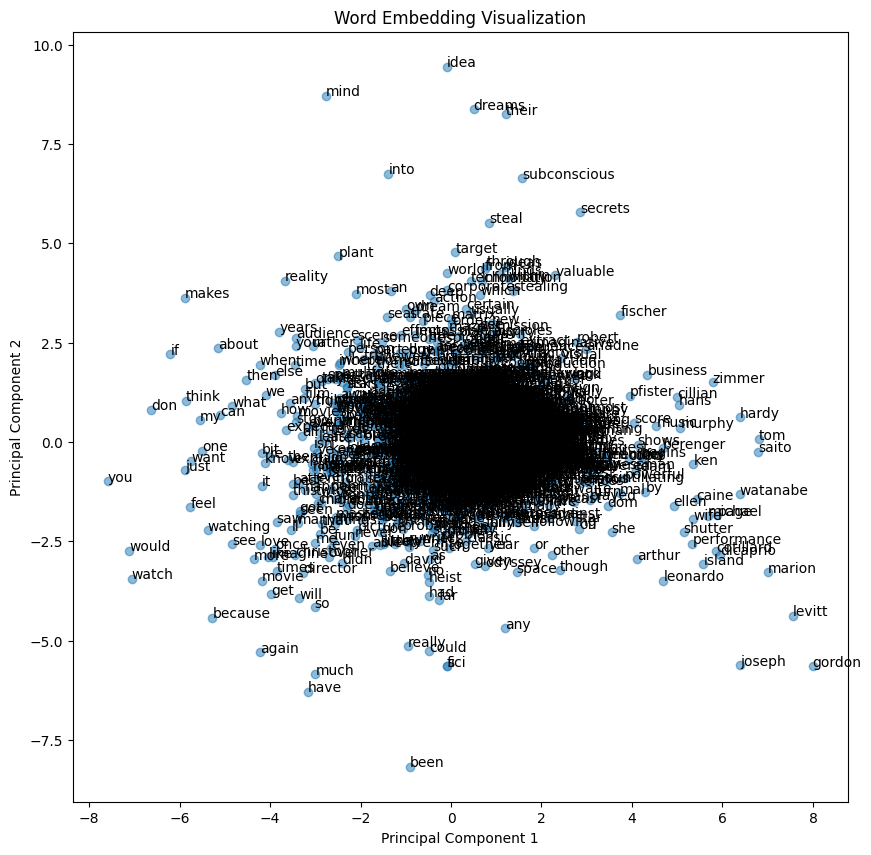

In [6]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import multiprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your data from a CSV file
df = pd.read_csv('reviews.csv')

# Extract the text data from the DataFrame
data = df['Review'].tolist()  # Replace 'column_name' with the name of the column containing the text data

# Preprocess the data
processed_data = [simple_preprocess(line) for line in data]

# Train the Word2Vec model
cores = multiprocessing.cpu_count()  # Count the number of CPU cores for parallelization
model = Word2Vec(processed_data, vector_size=300, window=5, min_count=1, workers=cores)

# Save the trained model
model.save("word2vec_model.bin")

# Visualize the word embeddings
word_vectors = model.wv
word_vector_matrix = word_vectors.vectors
words = list(word_vectors.key_to_index.keys())

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vector_matrix)

# Plot the word embeddings
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embedding Visualization')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/saar2599/INFO-5731_Computational-Methods.git



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [7]:
# Type your answer

"""This assignment is challenging. In question 2 building tf-idf matrix took lot of time
to work on it. Spent lot of time to work on the errors. No sufficient knowledge is there
to work on this. The time provided is not sufficient beacuse i'm still in the learning phase. Working on this
assignments require lot of time.
"""

"This assignment is challenging. In question 2 building tf-idf matrix took lot of time \nto work on it. Spent lot of time to work on the errors. No sufficient knowledge is there \nto work on this. The time provided is not sufficient beacuse i'm still in the learning phase. Working on this\nassignments require lot of time.\n"